In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### Нормирование исходных данных

* Y - ожидаемая продолжительности жизни мужчин 
* х1 - рождаемость населения на 1000 человек 
* х2 - смертность населения на 1000 человек 
* х3 - число браков на 1000 человек 
* х4 - число разводов на 1000 человек 
* х5 - коэффициент младенческой смертности
* х6 - соотношении денежного дохода и прожиточного минимума, %
* х7 - соотношении средней оплаты труда и прожиточного минимума
трудоспособного населения, % 
* х8 - численность населения с денежными доходами ниже прожиточного минимума в % от численности населения
* х9 - числа зарегистрированных преступлений на 100000 населения

In [2]:
df = pd.read_excel('lr1_train.xlsx').dropna()
df

,"ОКЭР (регион), данные на 2013 год",Y,х1,х2,х3,х4,х5,х6,x7,x8,x9
1,Республика Карелия,54.7,9.5,16.3,6.8,5.6,17.4,163.0,151.0,23.6,2344.0
2,Республика Коми,57.0,10.3,12.6,7.2,5.5,25.3,194.0,239.0,9.2,1809.0
3,Архангельская область,71.0,9.7,4.6,6.5,4.2,16.2,152.0,192.0,26.9,2406.0
4,Вологодская область,57.6,9.6,6.2,6.1,4.0,17.4,190.0,205.0,20.1,2023.0
5,Мурманская область,57.7,9.1,11.4,7.7,6.4,5.9,183.0,198.0,22.0,1419.0
12,Брянская облсть,60.1,10.2,15.9,7.8,5.3,16.7,169.0,148.0,22.7,2094.0
13,Владимирская область,58.5,8.6,16.4,6.7,4.7,15.5,144.0,150.0,27.9,1768.0
14,Ивановская область,57.4,8.3,18.3,6.3,4.9,19.6,138.0,133.0,33.7,1982.0
15,Калужская область,58.5,8.9,16.4,6.8,5.0,17.6,197.0,155.0,26.6,1621.0
16,Костромская область,58.3,8.9,17.0,6.3,4.4,20.1,182.0,159.0,30.5,1631.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 1 to 88
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ОКЭР (регион), данные на 2013 год  47 non-null     object 
 1   Y                                  47 non-null     float64
 2   х1                                 47 non-null     float64
 3   х2                                 47 non-null     float64
 4   х3                                 47 non-null     float64
 5   х4                                 47 non-null     float64
 6   х5                                 47 non-null     float64
 7   х6                                 47 non-null     float64
 8   x7                                 47 non-null     float64
 9   x8                                 47 non-null     float64
 10  x9                                 47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [4]:
X_train = df.drop(columns=['ОКЭР (регион), данные на 2013 год', 'Y']) 
Y_train = df['Y']                 
Y_train = Y_train.reset_index(drop=True)


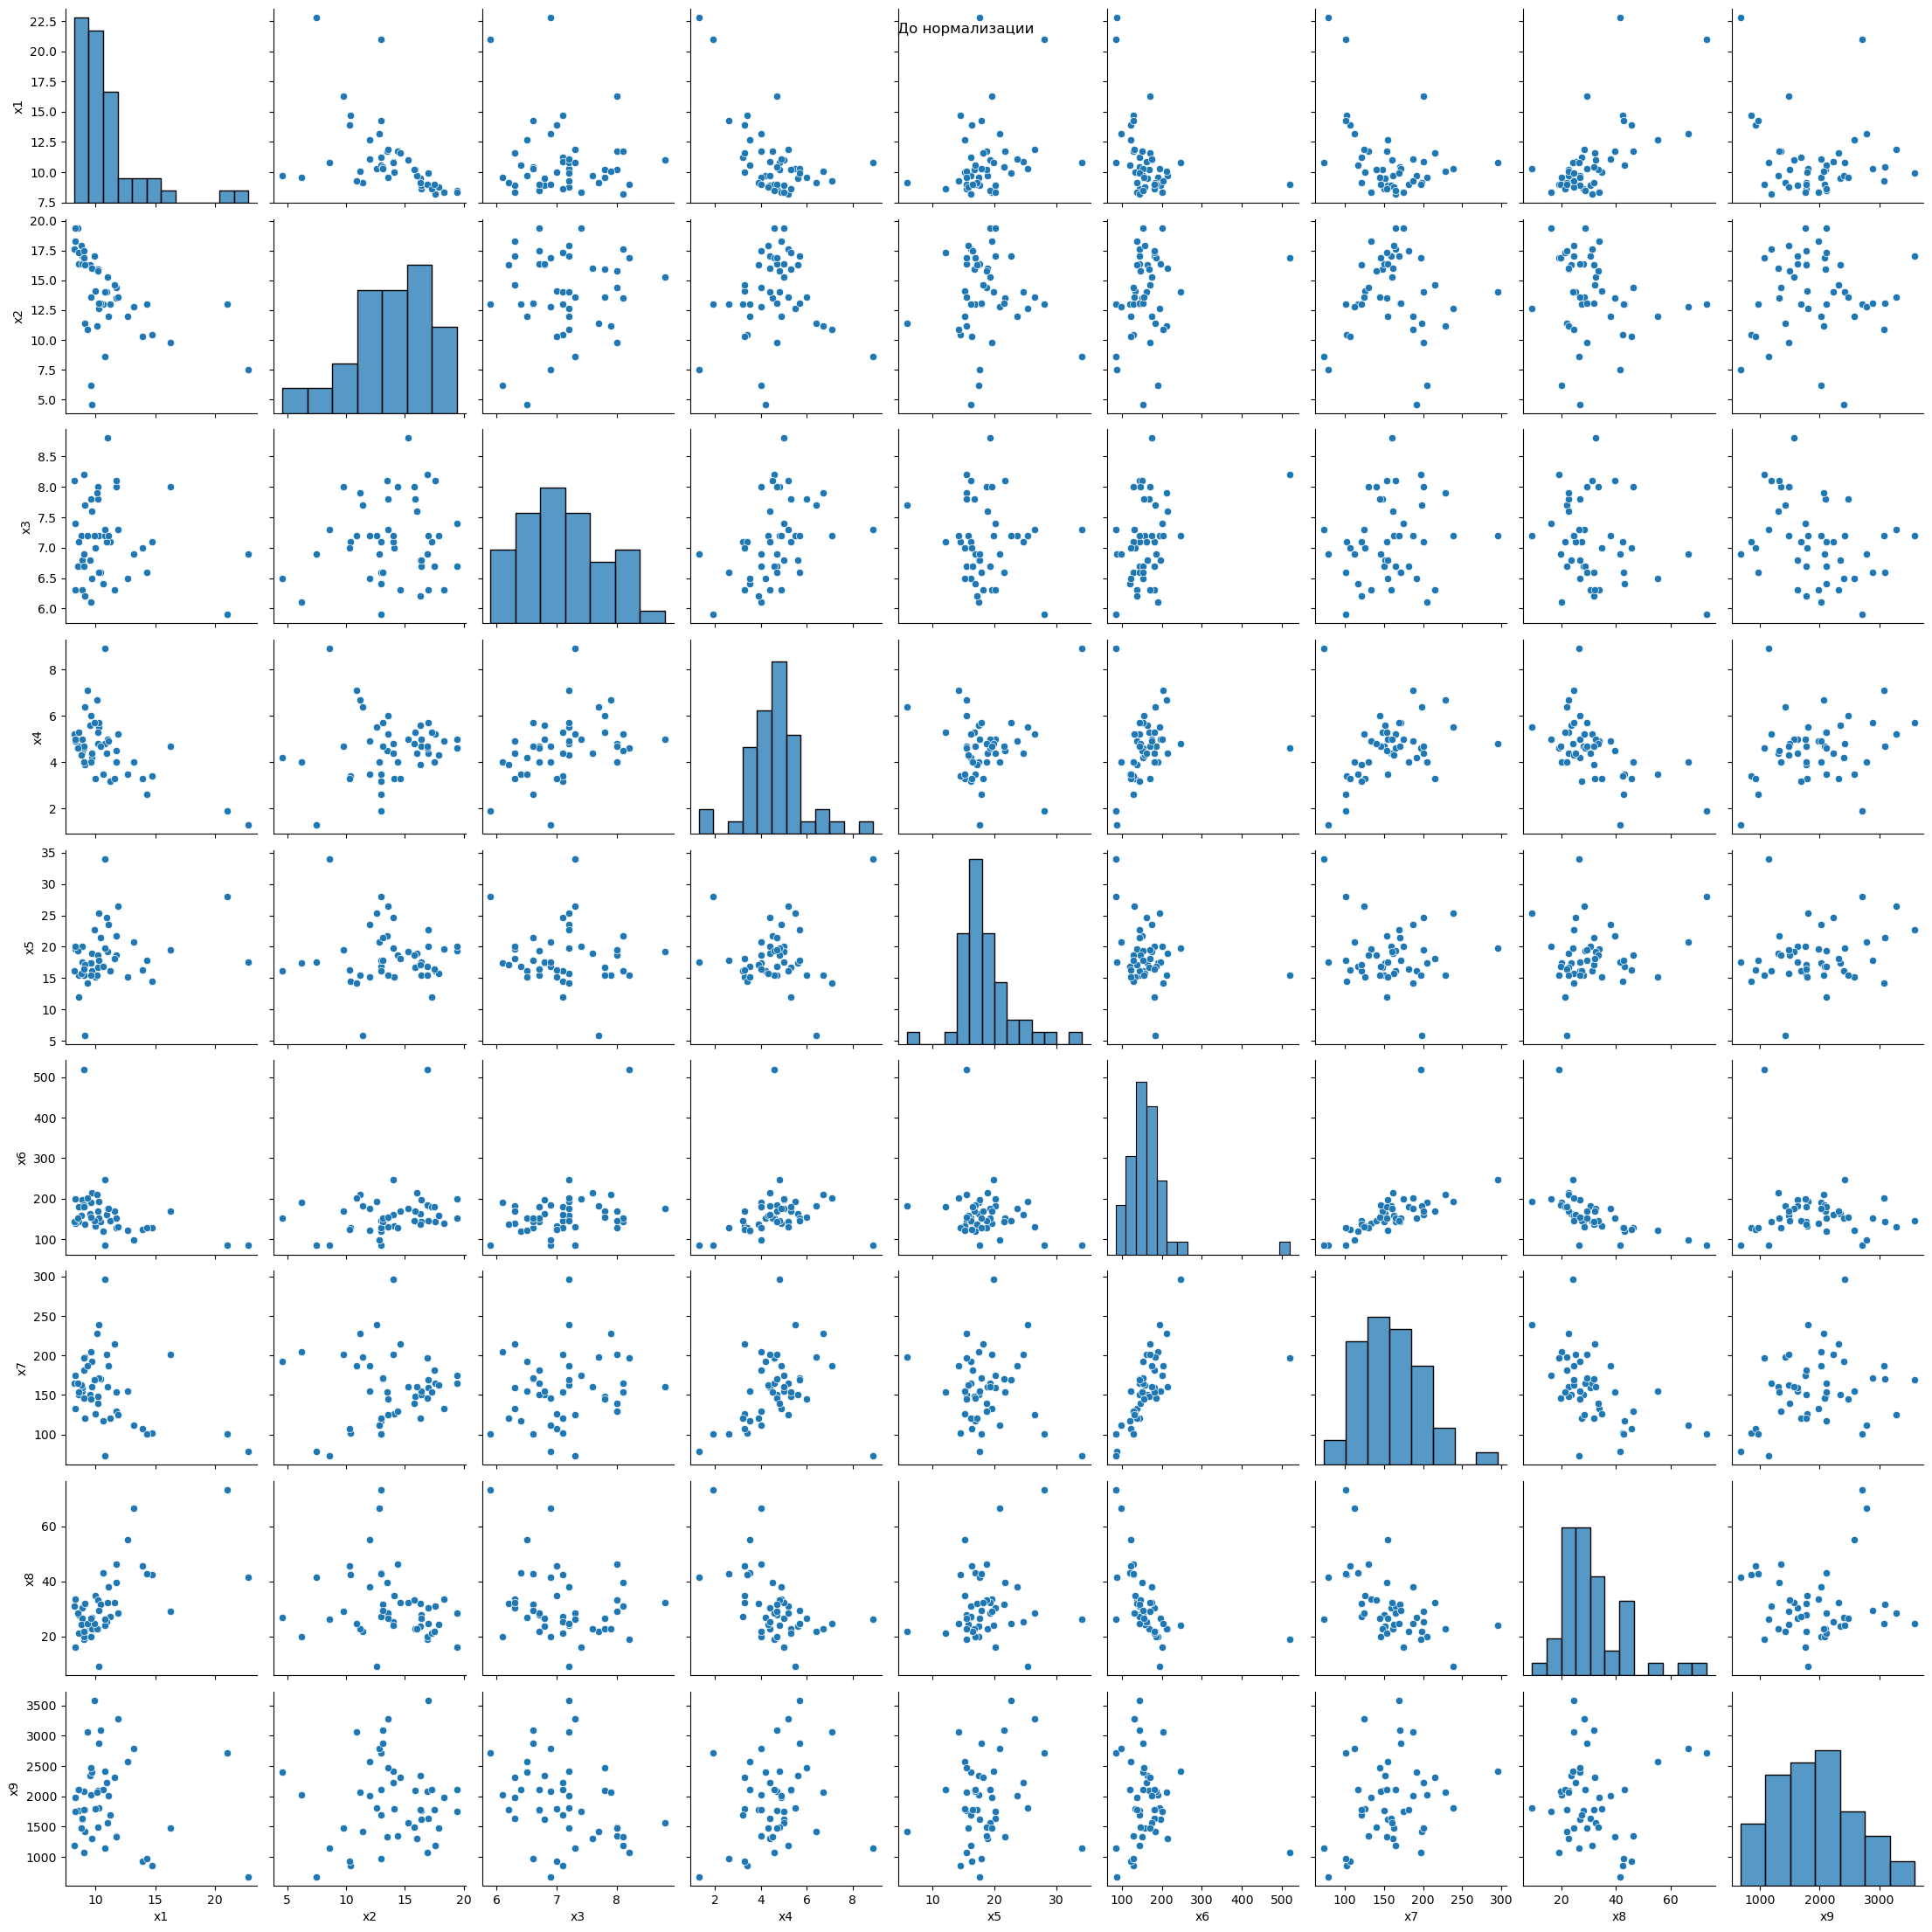

In [5]:
sns.pairplot(X_train)
plt.suptitle("До нормализации")
plt.show()

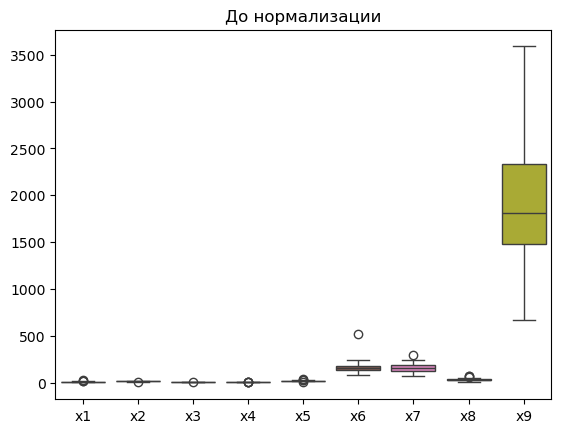

In [6]:
sns.boxplot(data=X_train)
plt.title("До нормализации")
plt.show()

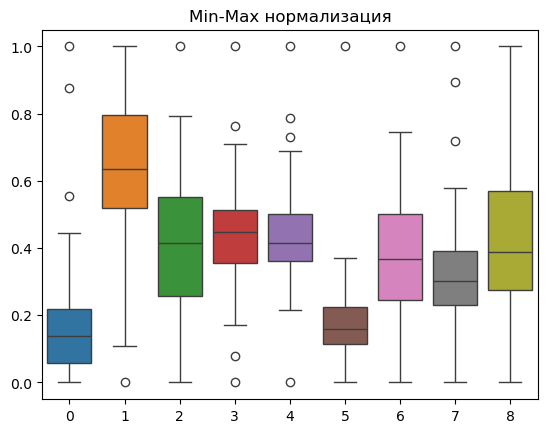

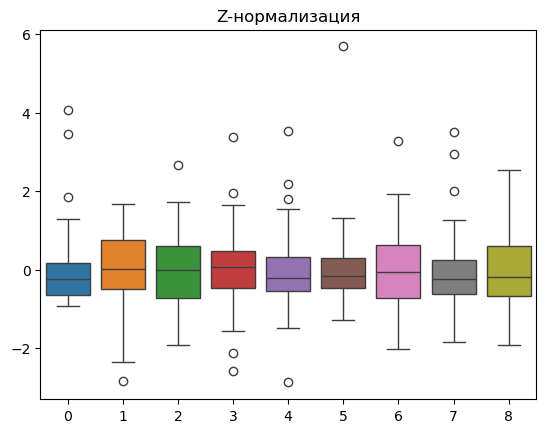

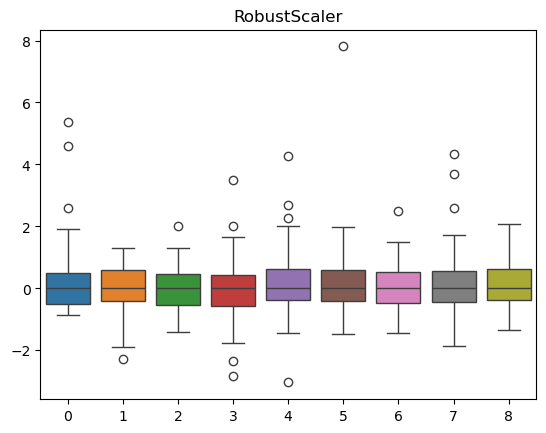

In [8]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

df_min_max = pd.DataFrame(min_max_scaler.fit_transform(X_train))
df_standard = pd.DataFrame(standard_scaler.fit_transform(X_train))
df_robust = pd.DataFrame(robust_scaler.fit_transform(X_train))

sns.boxplot(data=df_min_max)
plt.title("Min-Max нормализация")
plt.show()

sns.boxplot(data=df_standard)
plt.title("Z-нормализация")
plt.show()

sns.boxplot(data=df_robust)
plt.title("RobustScaler")
plt.show()

In [368]:
X_formula = df_min_max
X_gradient_descent = df_min_max
X_sklearn = df_min_max
X_statmodels = df_min_max

In [9]:
X_formula = df_standard
X_gradient_descent = df_standard
X_sklearn = df_standard
X_statmodels = df_standard

### Расчет весов линейной регрессии по аналитической формуле

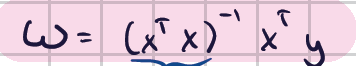

* hstack(x1, x2) - horizontal stack - объединение массивов по горизонтали (по столбцам)
* vstack(x1, x2) - vertical stack - объединение массивов по вертикали (по строкам)
* T - транспонированная матрица
* dot(x) - матричное умножение
* linalg.inv(x) - обратная матрица
* linalg.det(x) - определитель 
* linalg.cond(x) - вычисление числа обусловленности матрицы
* linalg.matrix_rank(x) - ранг матрицы
* linalg.norm(x) - вычисление нормы матрицы
* linalg.svd(x) - разложения по сингулярным значениям (SVD) матрицы

In [10]:
X_formula.shape[0]

47

In [11]:
# добавляем столбец единиц для свободного члена
X_formula_o = np.hstack((np.ones((X_formula.shape[0], 1)), X_formula.values))  # Добавляем столбец единиц
X_formula_o

array([[ 1.00000000e+00, -4.86363730e-01,  7.28674979e-01,
        -4.93055454e-01,  7.80798558e-01, -2.49986458e-01,
        -1.25721377e-02, -1.68888010e-01, -6.40962224e-01,
         6.33640287e-01],
       [ 1.00000000e+00, -2.12602109e-01, -4.00706294e-01,
         1.37518868e-01,  7.02385028e-01,  1.55584957e+00,
         4.82498259e-01,  1.91624873e+00, -1.84899128e+00,
        -1.80924387e-01],
       [ 1.00000000e+00, -4.17923325e-01, -2.84261175e+00,
        -9.65986196e-01, -3.16990868e-01, -5.24290664e-01,
        -1.88242279e-01,  8.02596154e-01, -3.64122233e-01,
         7.28038436e-01],
       [ 1.00000000e+00, -4.52143527e-01, -2.35423066e+00,
        -1.59656052e+00, -4.73817928e-01, -2.49986458e-01,
         4.18618208e-01,  1.11062772e+00, -9.34580397e-01,
         1.44901483e-01],
       [ 1.00000000e+00, -6.23244540e-01, -7.66992113e-01,
         9.25736771e-01,  1.40810680e+00, -2.87873510e+00,
         3.06828118e-01,  9.44764568e-01, -7.75187675e-01,
        -7.

In [12]:
# применяем формулу для расчета весов
omega_formula = np.linalg.inv(X_formula_o.T.dot(X_formula_o)).dot(X_formula_o.T).dot(Y_train)
print(f"Веса, рассчитанные по аналитической формуле: \n {omega_formula}")

Веса, рассчитанные по аналитической формуле: 
 [58.23617021 -2.10483027 -2.42128122  0.95750726 -2.14875258 -0.32268881
 -0.30566366 -1.15868994 -0.84045299 -0.79407424]


### Построение и интепретация корреляционной матрицы. Определение степени мультиколлинеарности на основе числа обусловленности.

In [14]:
X = df_standard
X.head(2)

,0,1,2,3,4,5,6,7,8
0,-0.486364,0.728675,-0.493055,0.780799,-0.249986,-0.012572,-0.168888,-0.640962,0.633640
1,-0.212602,-0.400706,0.137519,0.702385,1.555850,0.482498,1.916249,-1.848991,-0.180924


Text(0.5, 1.0, 'Корреляционная матрица')

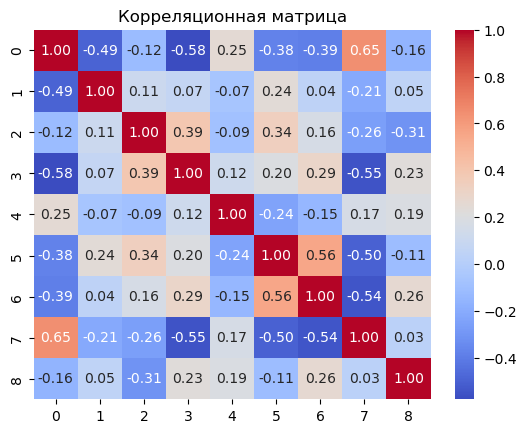

In [15]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")

In [16]:
covv = X_formula_o.T.dot(X_formula_o)
covv

array([[ 4.70000000e+01, -3.15303339e-14, -2.37310172e-14,
        -8.88178420e-16,  4.15223411e-14,  6.77236045e-15,
        -1.69309011e-15,  1.66533454e-15,  9.60342916e-15,
         7.54951657e-15],
       [-3.15303339e-14,  4.70000000e+01, -2.31711254e+01,
        -5.45542793e+00, -2.71617766e+01,  1.17894694e+01,
        -1.76796570e+01, -1.84354519e+01,  3.03663532e+01,
        -7.73028453e+00],
       [-2.37310172e-14, -2.31711254e+01,  4.70000000e+01,
         5.02473308e+00,  3.28085045e+00, -3.11093007e+00,
         1.12118475e+01,  2.08024722e+00, -9.91963544e+00,
         2.19585402e+00],
       [-8.88178420e-16, -5.45542793e+00,  5.02473308e+00,
         4.70000000e+01,  1.84276759e+01, -4.08141350e+00,
         1.57959305e+01,  7.71805150e+00, -1.21396644e+01,
        -1.46719594e+01],
       [ 4.15223411e-14, -2.71617766e+01,  3.28085045e+00,
         1.84276759e+01,  4.70000000e+01,  5.85251311e+00,
         9.19466313e+00,  1.38080915e+01, -2.57935841e+01,
         1.

In [17]:
covv = X_formula_o.T.dot(X_formula_o)
# для оценки полной мультколлинеарности считаем определитель 
np.linalg.det(covv)

1533435386279913.5

In [18]:
# для проверки частичной мультиколлинеарности считаем число обусловленности 
np.linalg.cond(X_formula_o)

4.805461631488788

In [32]:
from scipy.linalg import svd
# вычисляем сингулярные значения (SVD)
U, s, Vt = svd(X_formula_o)

# число обусловленности
condition_number = s.max() / s.min()

condition_number

4.805461631488785

### Анализ регрессионных остатков.

In [42]:
Y_pred = X_formula_o.dot(omega_formula)

e = Y_train - Y_pred

In [43]:
omega_formula

array([58.23617021, -2.10483027, -2.42128122,  0.95750726, -2.14875258,
       -0.32268881, -0.30566366, -1.15868994, -0.84045299, -0.79407424])

In [44]:
e

0    -0.961450
1    -0.104090
2     6.220541
3    -6.113756
4    -2.572978
5     2.161775
6     0.245163
7     1.748141
8     1.097283
9     1.592569
10   -0.173240
11   -2.450245
12   -0.450422
13   -0.491879
14    0.894450
15    1.419529
16    0.755958
17    1.094226
18   -0.928797
19   -0.786762
20   -2.512172
21   -0.377822
22   -0.117579
23    0.356579
24    2.822299
25   -0.029021
26    1.154359
27   -1.719866
28    0.167127
29    1.275161
30    0.091769
31   -0.159303
32   -2.026111
33   -0.961217
34    2.317052
35   -1.402181
36    0.194365
37   -0.979579
38   -1.095722
39   -0.356765
40    1.424697
41    1.808104
42    0.646956
43   -0.706690
44   -0.284333
45   -2.219493
46    0.493371
Name: Y, dtype: float64

In [50]:
mean_e = np.mean(e)
print(f"Среднее значение остатков: {mean_e}")

Среднее значение остатков: 2.267689582213086e-15


In [52]:
from statsmodels.stats.diagnostic import het_white

# Тест Уайта
white_test = het_white(e, X_formula_o)
print(f"White Test: LM Statistic = {white_test[0]}, p-value = {white_test[1]}")

White Test: LM Statistic = 47.0, p-value = 0.43134035811165294


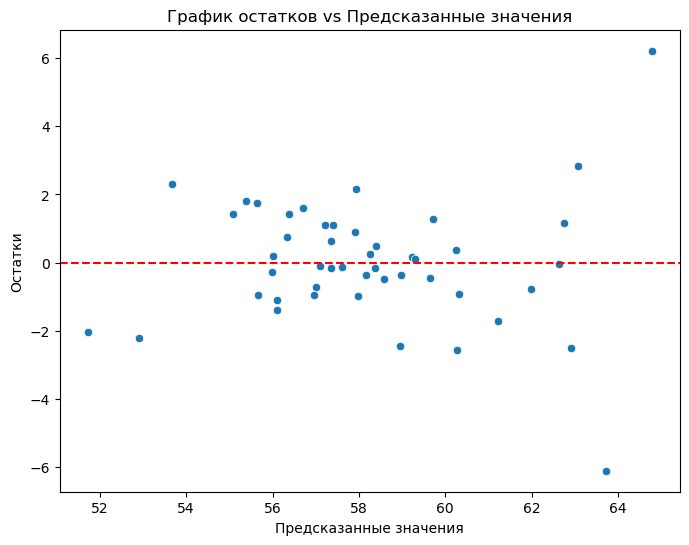

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_pred, y=e)
plt.axhline(0, color='r', linestyle='--')
plt.title('График остатков vs Предсказанные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

In [53]:
from statsmodels.stats.stattools import durbin_watson

# Рассчет статистики Дарбина-Уотсона - проверка на автокорреляцию
dw_statistic = durbin_watson(e)
print(f'Статистика Дарбина-Уотсона: {dw_statistic}')

Статистика Дарбина-Уотсона: 2.2216208108134987


Text(0, 0.5, 'Частота')

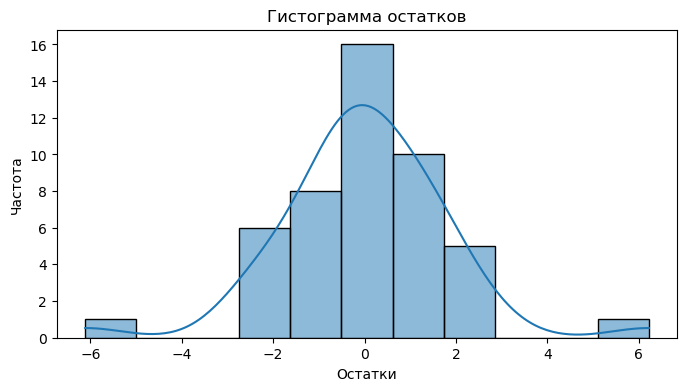

In [51]:
plt.figure(figsize=(8,4))
sns.histplot(e, kde=True)
plt.title("Гистограмма остатков")
plt.xlabel("Остатки")
plt.ylabel("Частота")

In [47]:
mae = np.mean(np.abs(e))
mse = np.mean(e**2)
print(f"MAE: {mae}")
print(f"MSE: {mse}")

ss_res = np.sum(e ** 2)  
ss_tot = np.sum((Y_train - np.mean(Y_train)) ** 2)  
r2 = 1 - (ss_res / ss_tot)
print(f"R^2: {r2}")

MAE: 1.275807350057947
MSE: 3.285065327612616
R^2: 0.7001679445457355


### Определение весов линейной регрессии градиентным методом

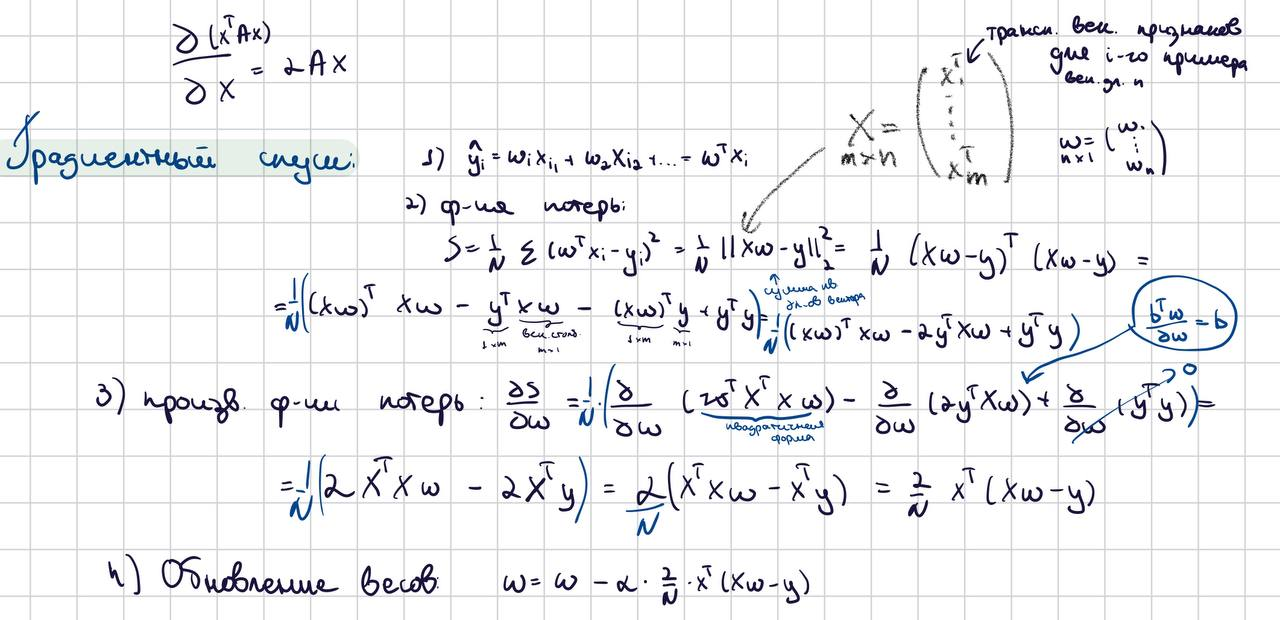

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
def gradient_descent(X, Y, learning_rate, n_iterations):
    Y = Y.values.reshape(-1, 1) # -1 для автоматического вычисления второй размерности
    n = X.shape[0]  
    omega = np.random.randn(X.shape[1], 1)  # инициализация весов случайными значениями
    error_history = [] 

    for iteration in range(n_iterations):
        # 1. вычисляем предсказания
        y_pred = X.dot(omega)
        error = y_pred - Y
        
        # 2. функция потерь
        mse = (1 / n) * np.sum(error ** 2)
        error_history.append(mse)
        
        # 3. производная функции потерь
        gradients = (2 / n) * X.T.dot(error)
        
        # 4. обновление весов
        omega -= learning_rate * gradients
        
        if iteration % 10 == 0:
            print(f"Итерация {iteration}, MSE: {mse}")
    
    return omega, error_history

learning_rate = 0.1  # Скорость обучения
n_iterations = 200 # Количество итераций

X_gradient_descent_o = np.hstack((np.ones((X_gradient_descent.shape[0], 1)), X_gradient_descent))
omega_grad, error_history = gradient_descent(X_gradient_descent_o, Y_train, learning_rate, n_iterations)

y_pred = X_gradient_descent_o.dot(omega_grad)

mae = mean_absolute_error(Y_train, y_pred)
print("MAE:", mae)

r2 = r2_score(Y_train, y_pred)
print("Коэффицент детерминации:", r2)

Итерация 0, MSE: 3455.3729815687725
Итерация 10, MSE: 44.13262626294757
Итерация 20, MSE: 4.325535522964393
Итерация 30, MSE: 3.612723680177625
Итерация 40, MSE: 3.4676102359236975
Итерация 50, MSE: 3.3888365750024256
Итерация 60, MSE: 3.3441517336821907
Итерация 70, MSE: 3.3187264837987493
Итерация 80, MSE: 3.3042468536605756
Итерация 90, MSE: 3.2959973046321154
Итерация 100, MSE: 3.2912962142519664
Итерация 110, MSE: 3.288616915203692
Итерация 120, MSE: 3.2870897852492553
Итерация 130, MSE: 3.286219321511202
Итерация 140, MSE: 3.2857231429446228
Итерация 150, MSE: 3.285440307711
Итерация 160, MSE: 3.2852790819569195
Итерация 170, MSE: 3.285187177004008
Итерация 180, MSE: 3.2851347873143513
Итерация 190, MSE: 3.285104922875613
MAE: 1.2760929252307773
Коэффицент детерминации: 0.7001658844465908


### Сравнение результатов по аналитическому и градиентному методу.

Сравнительный анализ

*MSE*:

MSE для аналитического метода = 3.2851.

MSE для градиентного метода = 3.2851.

Значения MSE для обоих методов практически идентичны, что говорит о том, что обе модели обеспечивают схожую точность в предсказаниях.

*R²:*

R² для аналитического метода = 0.7002.

R² для градиентного метода = 0.7002.

Оба метода показывают одинаковую способность объяснять 70% вариации зависимой переменной, что указывает на сопоставимую подгонку модели к данным.


При использовании градиентного метода мы достигли точности аналитического метода, проведя 150 итераций со скоростью обучения 0.1. 

При должной настройке гиперпараметров градиентный метод может успешно конкурировать с аналитическим методом, обеспечивая сопоставимые результаты в линейной регрессии.

### С помощью библиотеки sklearn сделать fit-predict модели линейной регрессии.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [60]:
model = LinearRegression(fit_intercept=True)  # fit_intercept=True означает, что модель добавит свободный член автоматически

model.fit(X_sklearn, Y_train)

y_pred = model.predict(X_sklearn)

print("Предсказания:", y_pred)

mse = mean_squared_error(Y_train, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(Y_train, y_pred)
print("MAE:", mae)

r2 = r2_score(Y_train, y_pred)
print("Коэффицент детерминации:", r2)

Предсказания: [55.66144988 57.10408996 64.77945897 63.71375592 60.27297791 57.93822526
 58.25483746 55.65185882 57.40271701 56.70743115 58.37323994 58.95024519
 59.65042152 58.59187904 57.9055501  55.08047128 56.34404238 57.20577402
 60.32879736 61.98676193 62.91217192 58.97782226 57.61757857 60.24342124
 63.07770138 62.62902093 62.74564091 61.21986617 59.23287258 59.7248388
 59.3082314  57.35930326 51.72611066 56.9612173  53.68294842 56.10218124
 56.00563467 57.97957897 56.09572235 58.15676519 56.37530261 55.39189579
 57.35304391 57.00668967 55.98433281 52.91949279 58.40662912]
MSE: 3.285065327612625
MAE: 1.27580735005795
Коэффицент детерминации: 0.7001679445457347


In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ОКЭР (регион), данные на 2013 год', 'Y']) 
Y = df['Y']                 
Y = Y_train.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

X_train = pd.DataFrame(standard_scaler.fit_transform(X_train))
X_test = pd.DataFrame(standard_scaler.transform(X_test))

In [64]:
model = LinearRegression(fit_intercept=True)  # fit_intercept=True означает, что модель добавит свободный член автоматически

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Предсказания:", y_pred)

mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка:", mse)

r2 = r2_score(y_test, y_pred)
print("Коэффицент детерминации:", r2)

Предсказания: [60.09266859 54.92326549 51.99333271 57.52558707 57.58732196 58.3115897
 53.47983505 55.15098228 59.60705319 55.82101441]
Среднеквадратичная ошибка: 15.568091628673765
Коэффицент детерминации: 0.3506368614574811


### С помощью библиотеки statmodels получить «эконометрический» результат обучения модели линейной регрессии.

In [65]:
import statsmodels.api as sm

In [66]:
X_statmodels_o = sm.add_constant(X_statmodels)  # добавление константы для свободного члена
model = sm.OLS(Y_train, X_statmodels_o)  # Ordinary Least Squares
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     9.600
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.27e-07
Time:                        22:53:57   Log-Likelihood:                -94.641
No. Observations:                  47   AIC:                             209.3
Df Residuals:                      37   BIC:                             227.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2362      0.298    195.444      0.0

* х1 - рождаемость населения на 1000 человек 
* х2 - смертность населения на 1000 человек 
* х3 - число браков на 1000 человек 
* х4 - число разводов на 1000 человек 
* х5 - коэффициент младенческой смертности
* х6 - соотношении денежного дохода и прожиточного минимума, %
* х7 - соотношении средней оплаты труда и прожиточного минимума
трудоспособного населения, % 
* х8 - численность населения с денежными доходами ниже прожиточного минимума в % от численности населения
* х9 - числа зарегистрированных преступлений на 100000 населения

### Сравнить качество получаемых моделей на основе коэффициента детерминации и MSE.

Получили одинаковую точность предсказаний, что подтверждается идентичными значениями MSE, MAE и коэффициента детерминации (R²).

Аналитический метод:

MSE: 3.2851
MAE: 1.2758
R²: 0.7002

Градиентный метод (при 150 итераций):

MSE: 3.2851
MAE: 1.276
R²: 0.7002

Модель, обученная с помощью sklearn:

MSE: 3.2851
MAE: 1.2758
R²: 0.7002
